In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [3]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  n


In [4]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [5]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.13663198692081777, 0.5503246785635572],
 'diameter': 61.2343796895454,
 'confidence': 0.905013382434845,
 'timestamp': 57207.562718,
 'sphere': {'center': [-2.1865461128587813,
   1.2618286505271281,
   37.33150378175277],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [79.28159815472853, 105.4790051129609],
  'axes': [189.03076204936448, 189.03076204936448],
  'angle': 0.0},
 'circle_3d': {'center': [-6.703668396633761,
   -1.790288640944775,
   28.48389470853295],
  'normal': [-0.4346602944166569, -0.29369012330493577, -0.8513615800180068],
  'radius': 2.6662005692432347},
 'diameter_3d': 5.332401138486469,
 'ellipse': {'center': [26.23334148879701, 86.33766171579704],
  'axes': [48.86777595695717, 61.2343796895454],
  'angle': 29.169363014755035},
 'location': [26.23334148879701, 86.33766171579704],
 'model_confidence': 1.0,
 'theta': 1.8688812501880583,
 'phi': -2.042846071671315

Text(0.5, 0, 'Pupil timestamp (s)')

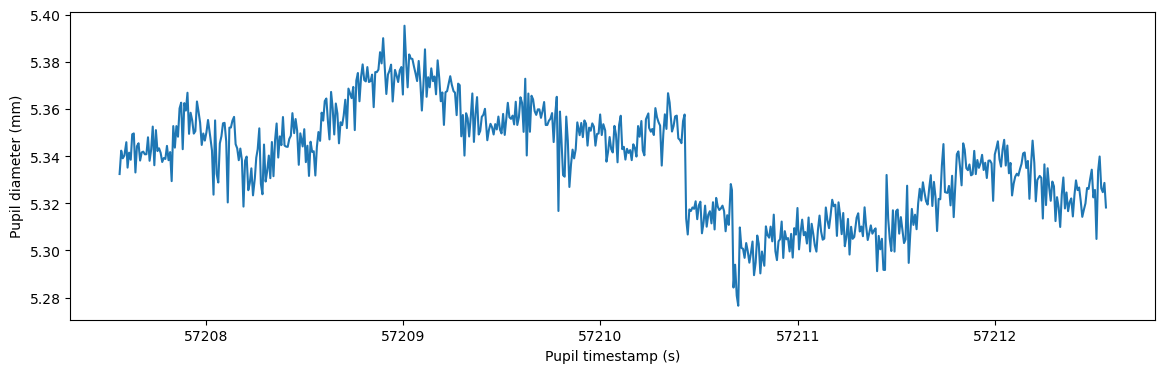

In [6]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')